# Load txt data and plot the results

This example will show one of many ways of loading text data.

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# make plots look nicer
sns.set_style("darkgrid")
sns.set_context("talk")

## Inspect the data

Loading ASCII data usually starts with a brief inspection of the data files at hand.

In [3]:
# show first 20 lines (note the typo in the second column of the second row)
!head -n20 data/baltic_sea_level/OSTSEE_FLENSBURG.dat

# OSTSEE_FLENSBURG
time-stamp sea-level-in-m
2018-01-16T00:01 480.000000
2018-01-16T00:02 480.000000
2018-01-16T00:03 480.000000
2018-01-16T00:04 480.000000
2018-01-16T00:05 480.000000
2018-01-16T00:06 480.000000
2018-01-16T00:07 480.000000
2018-01-16T00:08 480.000000
2018-01-16T00:09 480.000000
2018-01-16T00:10 480.000000
2018-01-16T00:11 480.000000
2018-01-16T00:12 479.000000
2018-01-16T00:13 479.000000
2018-01-16T00:14 479.000000
2018-01-16T00:15 479.000000
2018-01-16T00:16 479.000000
2018-01-16T00:17 479.000000
2018-01-16T00:18 479.000000


## Load one dataset as a first test

In [4]:
test_data_FLENSBURG = np.loadtxt(
    "data/baltic_sea_level/OSTSEE_GREIFSWALD-WIECK.dat",
    skiprows=2,
    dtype=np.object)

In [5]:
test_data_FLENSBURG

array([['2018-01-16T00:01', '452.000000'],
       ['2018-01-16T00:02', '452.000000'],
       ['2018-01-16T00:03', '452.000000'],
       ...,
       ['2018-02-16T23:58', 'nan'],
       ['2018-02-16T23:59', 'nan'],
       ['2018-02-17T00:00', 'nan']], dtype=object)

Doesn't look too bad.  But we note that everything is strings...

In [6]:
type(test_data_FLENSBURG[0, 0]), type(test_data_FLENSBURG[0, 1])

(str, str)

We need a converter for the time stamps.  And we'll use `np.float()`  for the numbers.

In [7]:
def str2date(date_string):
    return datetime.strptime(date_string.decode("utf-8"), '%Y-%m-%dT%H:%M')

In [8]:
test_data_FLENSBURG = np.loadtxt(
    "data/baltic_sea_level/OSTSEE_GREIFSWALD-WIECK.dat",
    skiprows=2,
    converters={0: str2date, 1: np.float},
    dtype=np.object)
test_data_FLENSBURG

array([[datetime.datetime(2018, 1, 16, 0, 1), 452.0],
       [datetime.datetime(2018, 1, 16, 0, 2), 452.0],
       [datetime.datetime(2018, 1, 16, 0, 3), 452.0],
       ...,
       [datetime.datetime(2018, 2, 16, 23, 58), nan],
       [datetime.datetime(2018, 2, 16, 23, 59), nan],
       [datetime.datetime(2018, 2, 17, 0, 0), nan]], dtype=object)

## Load data into a dictionary

_**Note** that we do not need to organize this in dictionaries.  But it allows for very elegant iterations over all stations in the actual analysis below._

In [9]:
data = {}

data["OSTSEE_GREIFSWALD-WIECK"] = np.loadtxt(
    "data/baltic_sea_level/OSTSEE_GREIFSWALD-WIECK.dat",
    skiprows=2,
    converters = {0: str2date, 1: np.float},
    dtype=np.object)

data["OSTSEE_LT+KIEL"] = np.loadtxt(
    "data/baltic_sea_level/OSTSEE_LT+KIEL.dat",
    skiprows=2,
    converters = {0: str2date, 1: np.float},
    dtype=np.object)

data["OSTSEE_FLENSBURG"] = np.loadtxt(
    "data/baltic_sea_level/OSTSEE_FLENSBURG.dat",
    skiprows=2,
    converters = {0: str2date, 1: np.float},
    dtype=np.object)

## Inspect the data dictionary

### How do you find out what is included?

### How do you print contents of the dictionary?

Try and print the data for, e.g., Greifswald.

## Remove the mean from a time series

In [10]:
def calculate_anomalies(time_series):
    """Returns an array with the mean along the first axis removed.
    
    """
    time_series = np.ma.masked_invalid(time_series)
    return time_series - time_series.mean(axis=0)

## Plot the full time series and the anomalies

You'll have to add code here.

Hints:

- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
- https://matplotlib.org/1.3.0/users/legend_guide.html#plotting-guide-legend

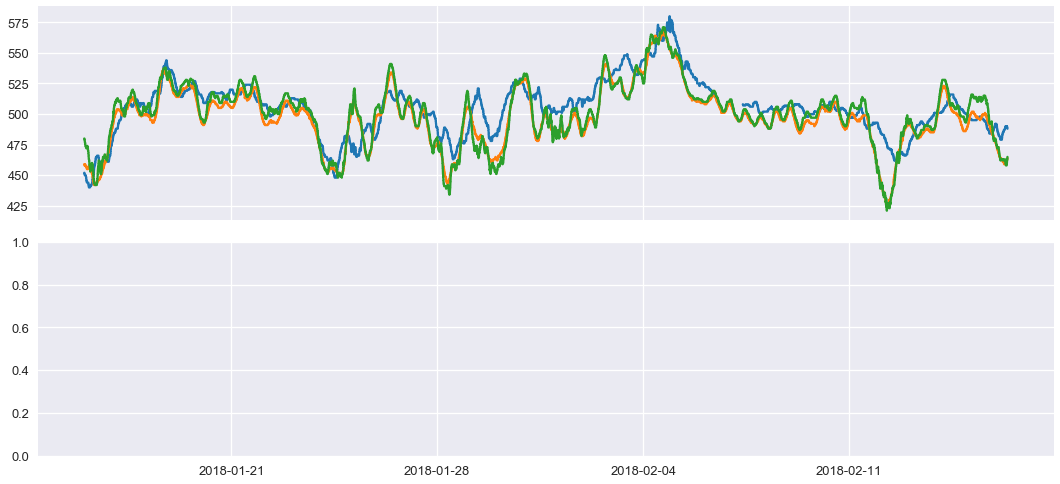

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

for station, station_data in data.items():
    ax[0].plot(station_data[:, 0], 
               station_data[:, 1],
               label=station);
    
    # Insert a second sub-plot with the anomalies
    # ax[1] = ...
    
# add a caption to the vertical axes

# ax[0]....
# ax[1]....

# add a legend

# Harmonize padding of subplots, labels, etc:
fig.tight_layout()

## Key concepts from this notebook

- importing modules
- display figures inline (see also [IPython magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib))
- reading text data with Numpy
- used broadcasting when calculating anomalies